# Stock Market Prediction

## Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

## Data

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-02,101.470001,103.900002,101.150002,103.629997,103.629997,73469400,AMAZON
2023-05-03,103.739998,105.959999,103.279999,103.650002,103.650002,65051900,AMAZON
2023-05-04,104.040001,105.389999,103.309998,104.000000,104.000000,45345500,AMAZON
2023-05-05,104.269997,105.760002,103.550003,105.660004,105.660004,56912900,AMAZON
2023-05-08,105.040001,106.099998,104.699997,105.830002,105.830002,49430900,AMAZON
2023-05-09,105.480003,106.790001,105.160004,106.620003,106.620003,44089400,AMAZON
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600,AMAZON
2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74924800,AMAZON
2023-05-12,112.160004,112.639999,109.320000,110.260002,110.260002,49810100,AMAZON


## Descriptive Statistics about the Data


In [3]:
# Summary Stats
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,107.617630,109.449871,105.784831,107.661960,107.661960,7.052509e+07
std,14.864927,15.104076,14.744241,14.908055,14.908055,2.717371e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,1.596921e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.310495e+07
50%,104.190002,106.099998,102.519997,104.300003,104.300003,6.462250e+07
75%,116.000000,118.509998,113.954998,116.240002,116.240002,8.001025e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


In [4]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-05-16 to 2023-05-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price 

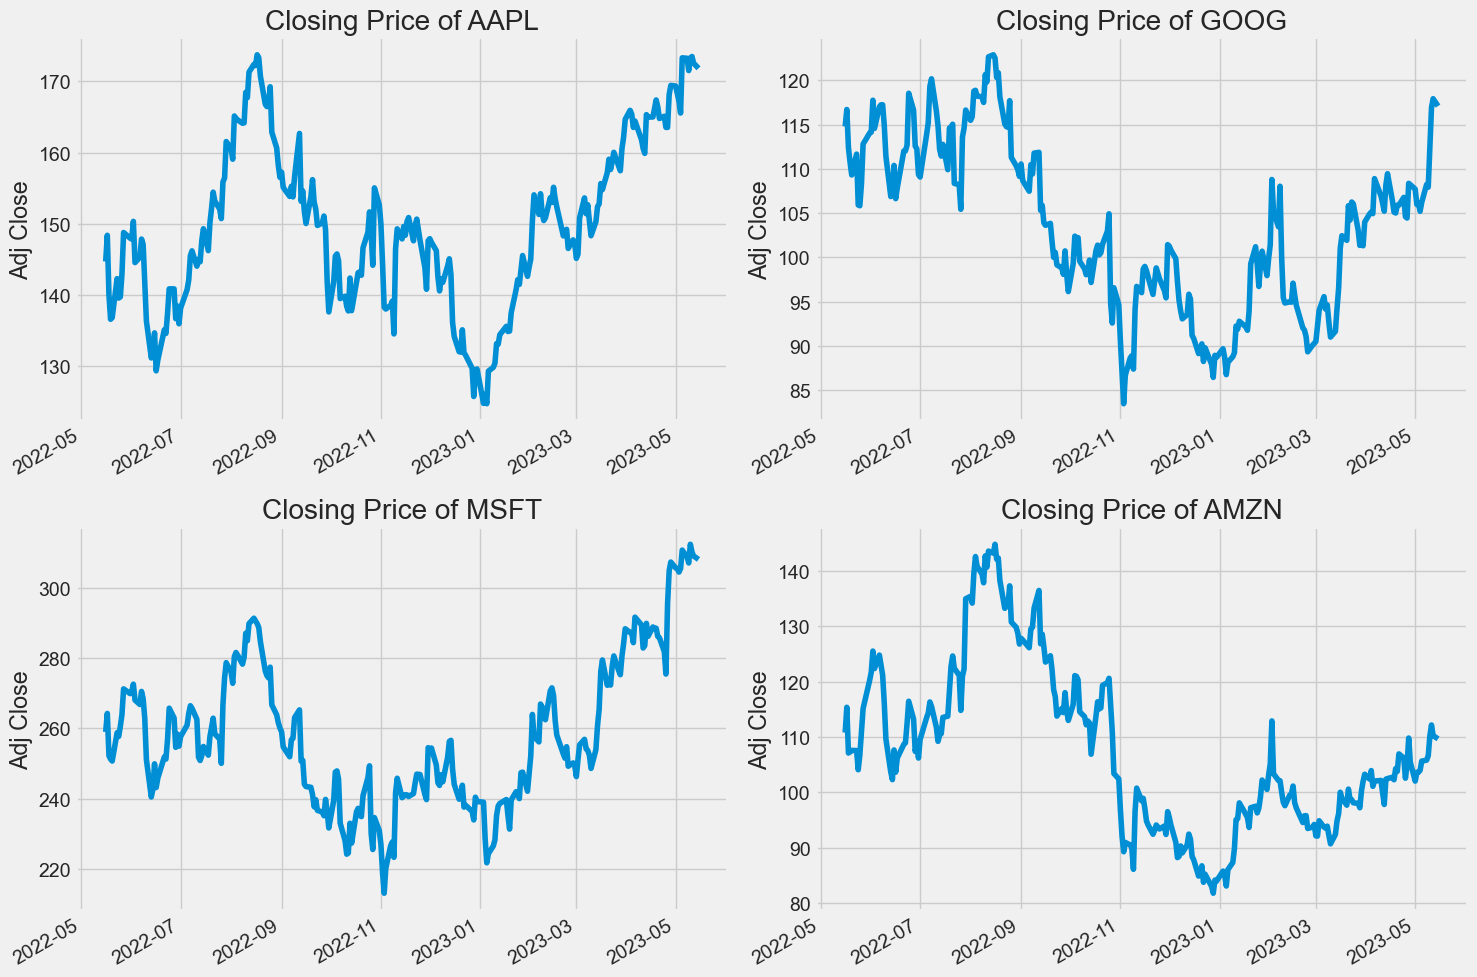

In [5]:
# Historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales

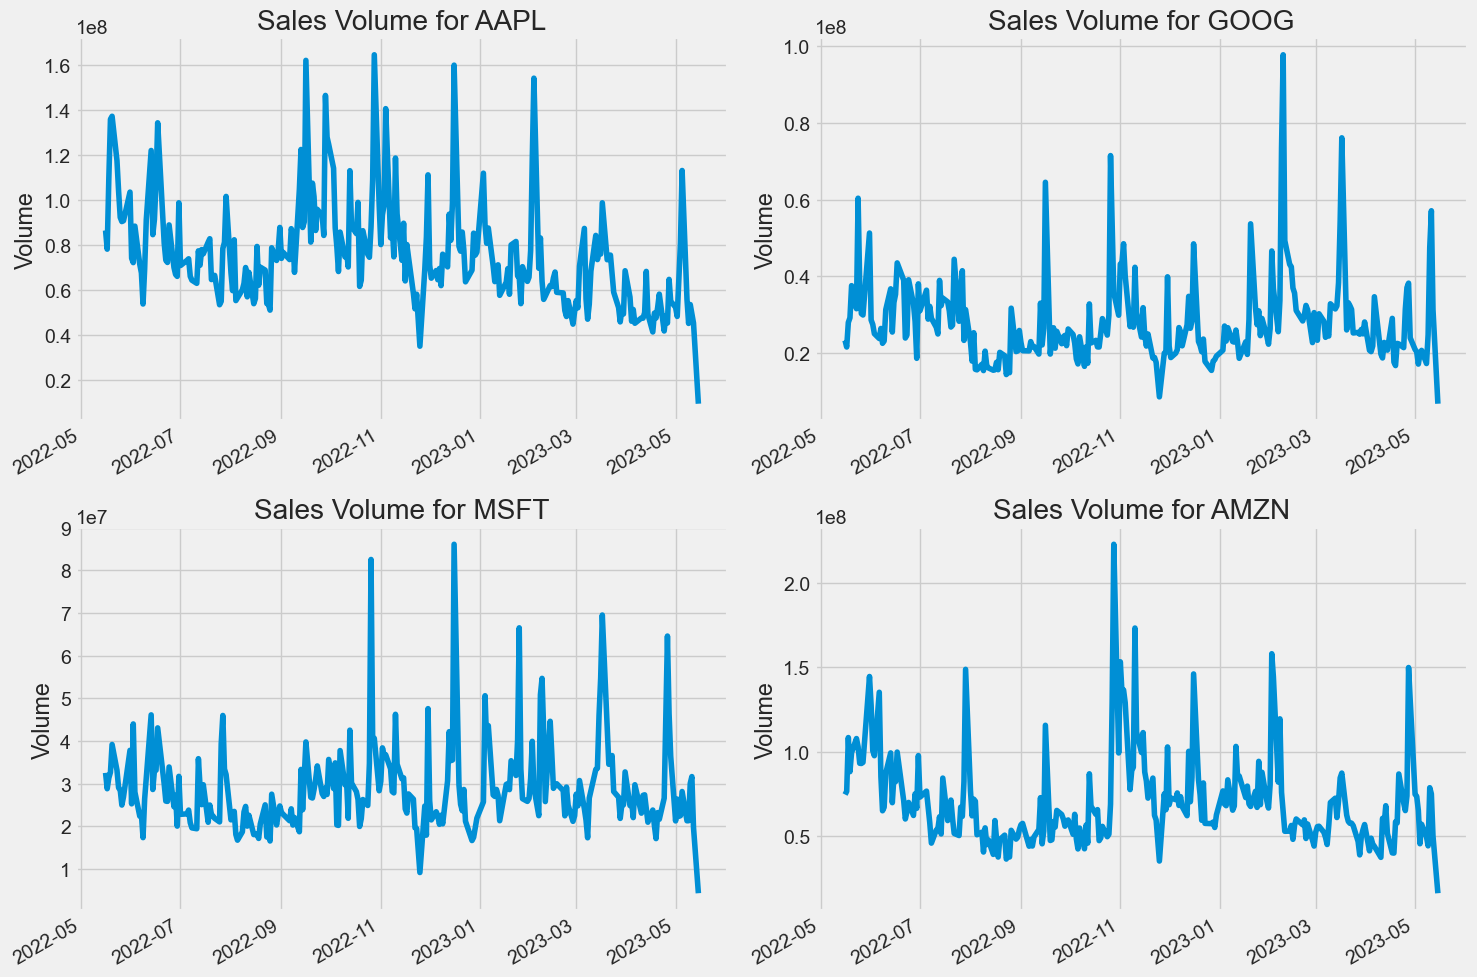

In [6]:
# Ploting the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## Moving average of the various stocks

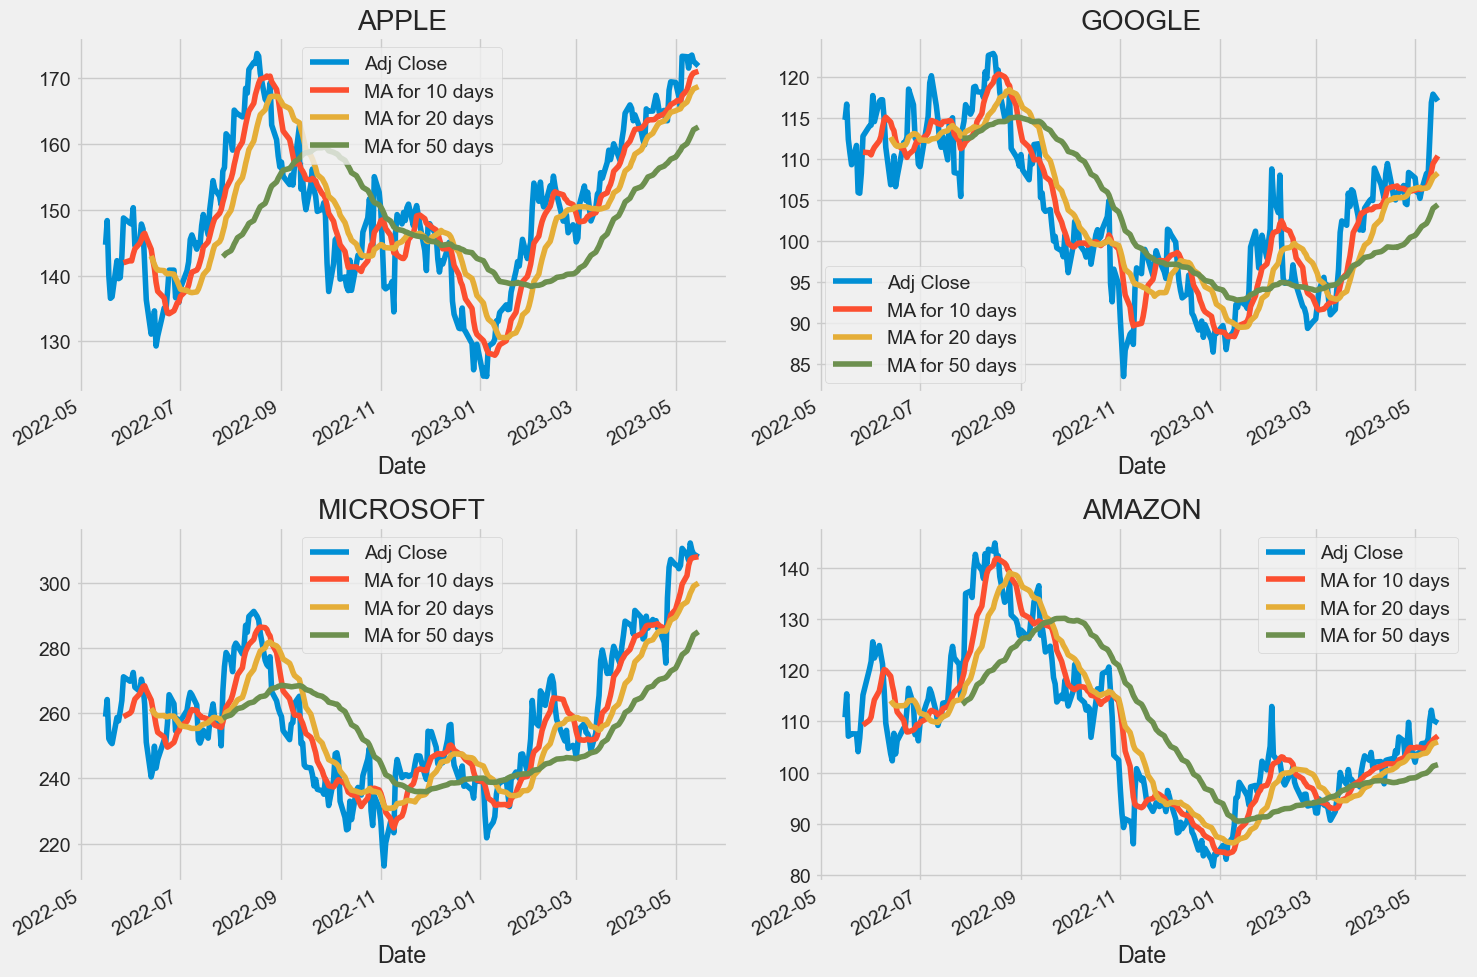

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily return of the stock on average

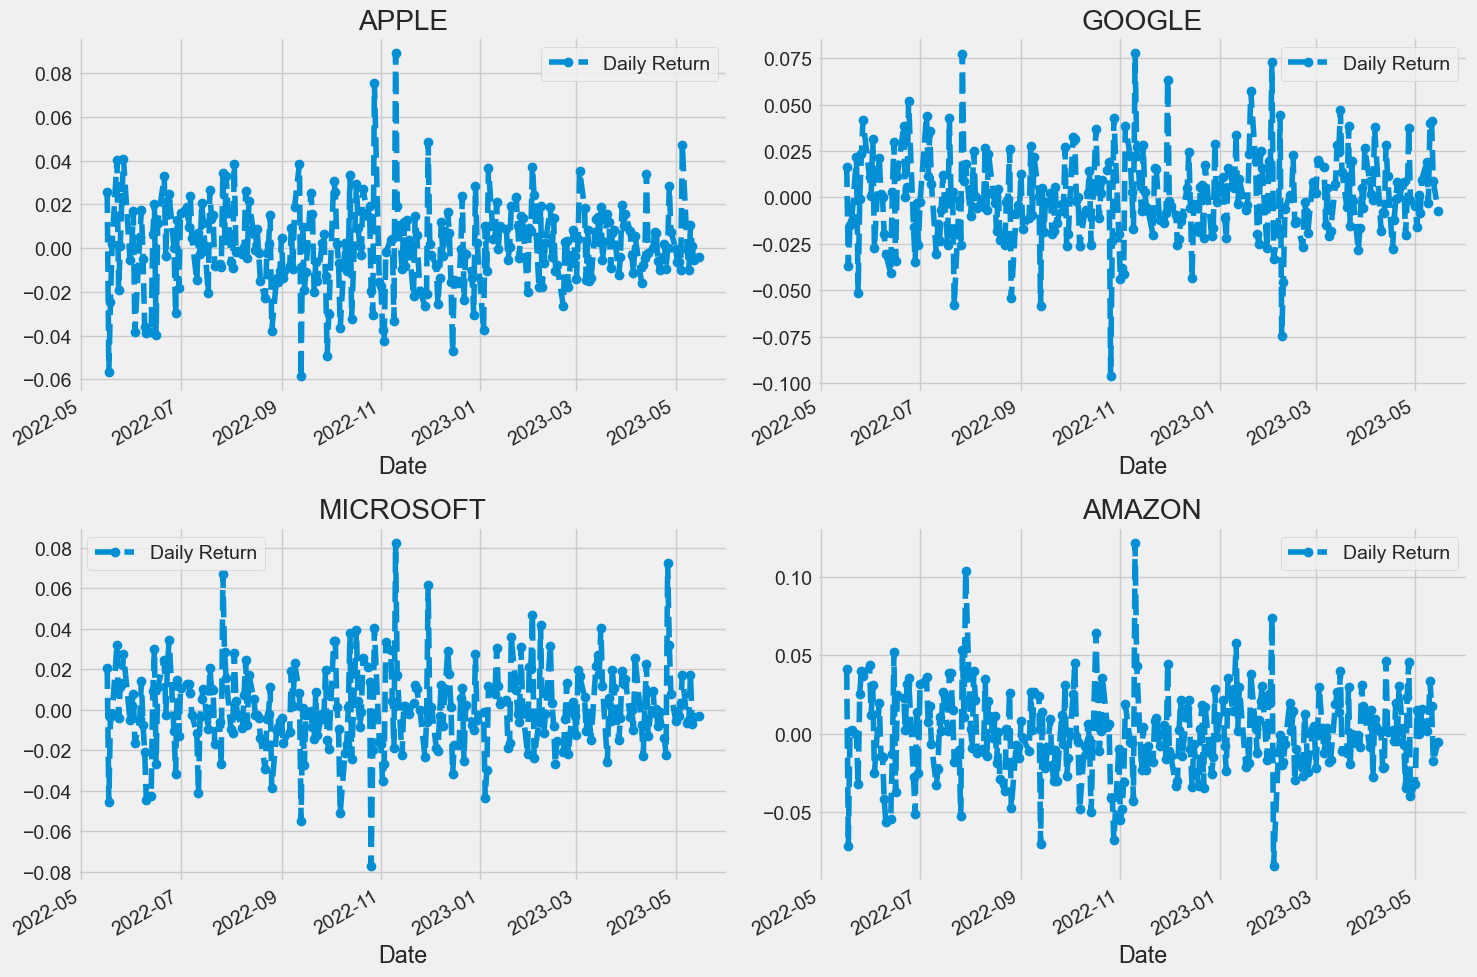

In [8]:
# Using pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


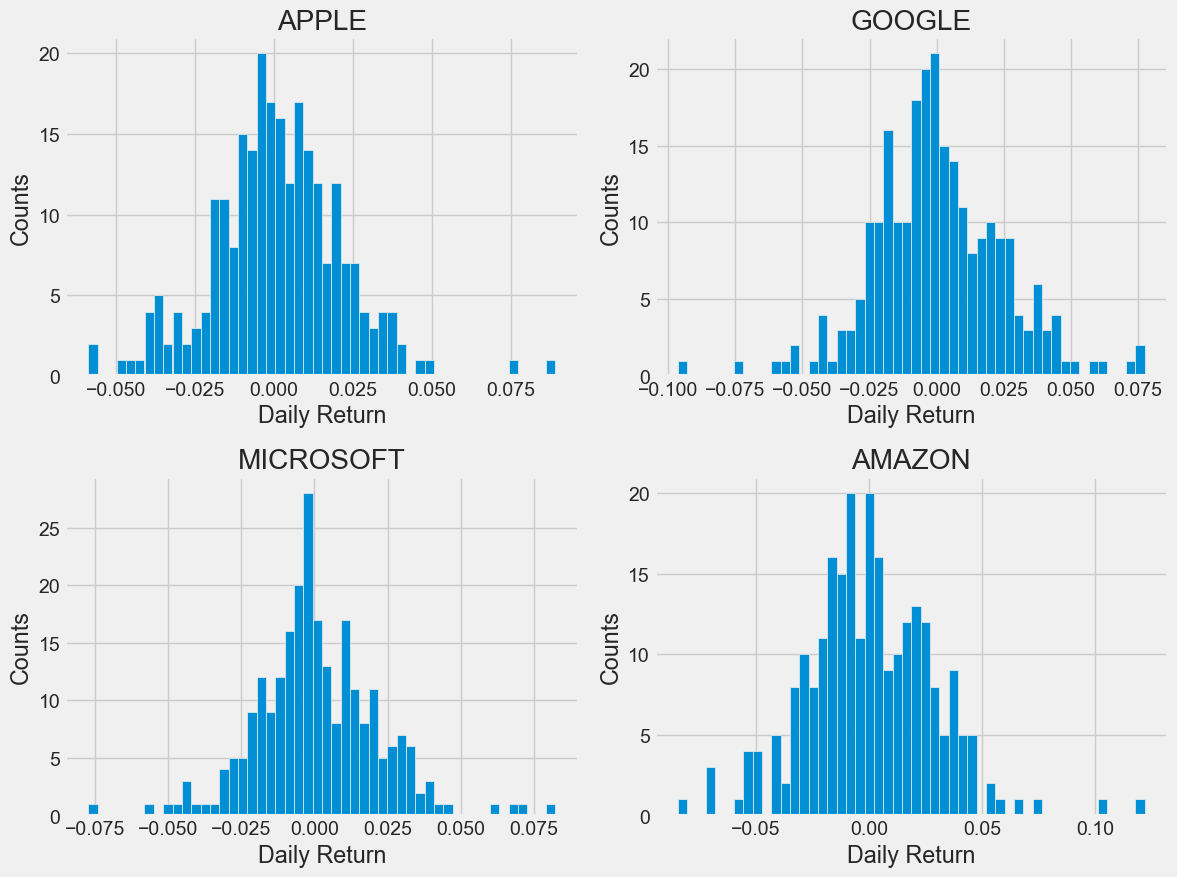

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Correlation between different stocks closing prices

In [10]:
# Grabing all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-16,NaN,NaN,NaN,NaN
2022-05-17,0.025423,0.041133,0.016630,0.020344
2022-05-18,-0.056419,-0.071562,-0.036850,-0.045530
2022-05-19,-0.024642,0.001928,-0.014729,-0.003700
2022-05-20,0.001747,0.002535,-0.012935,-0.002291


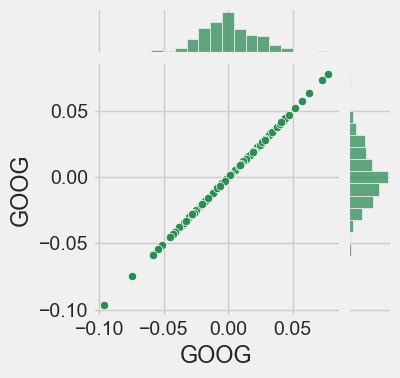

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen', height=4)

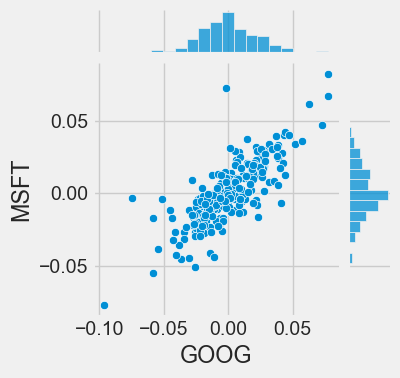

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter',  height=4)

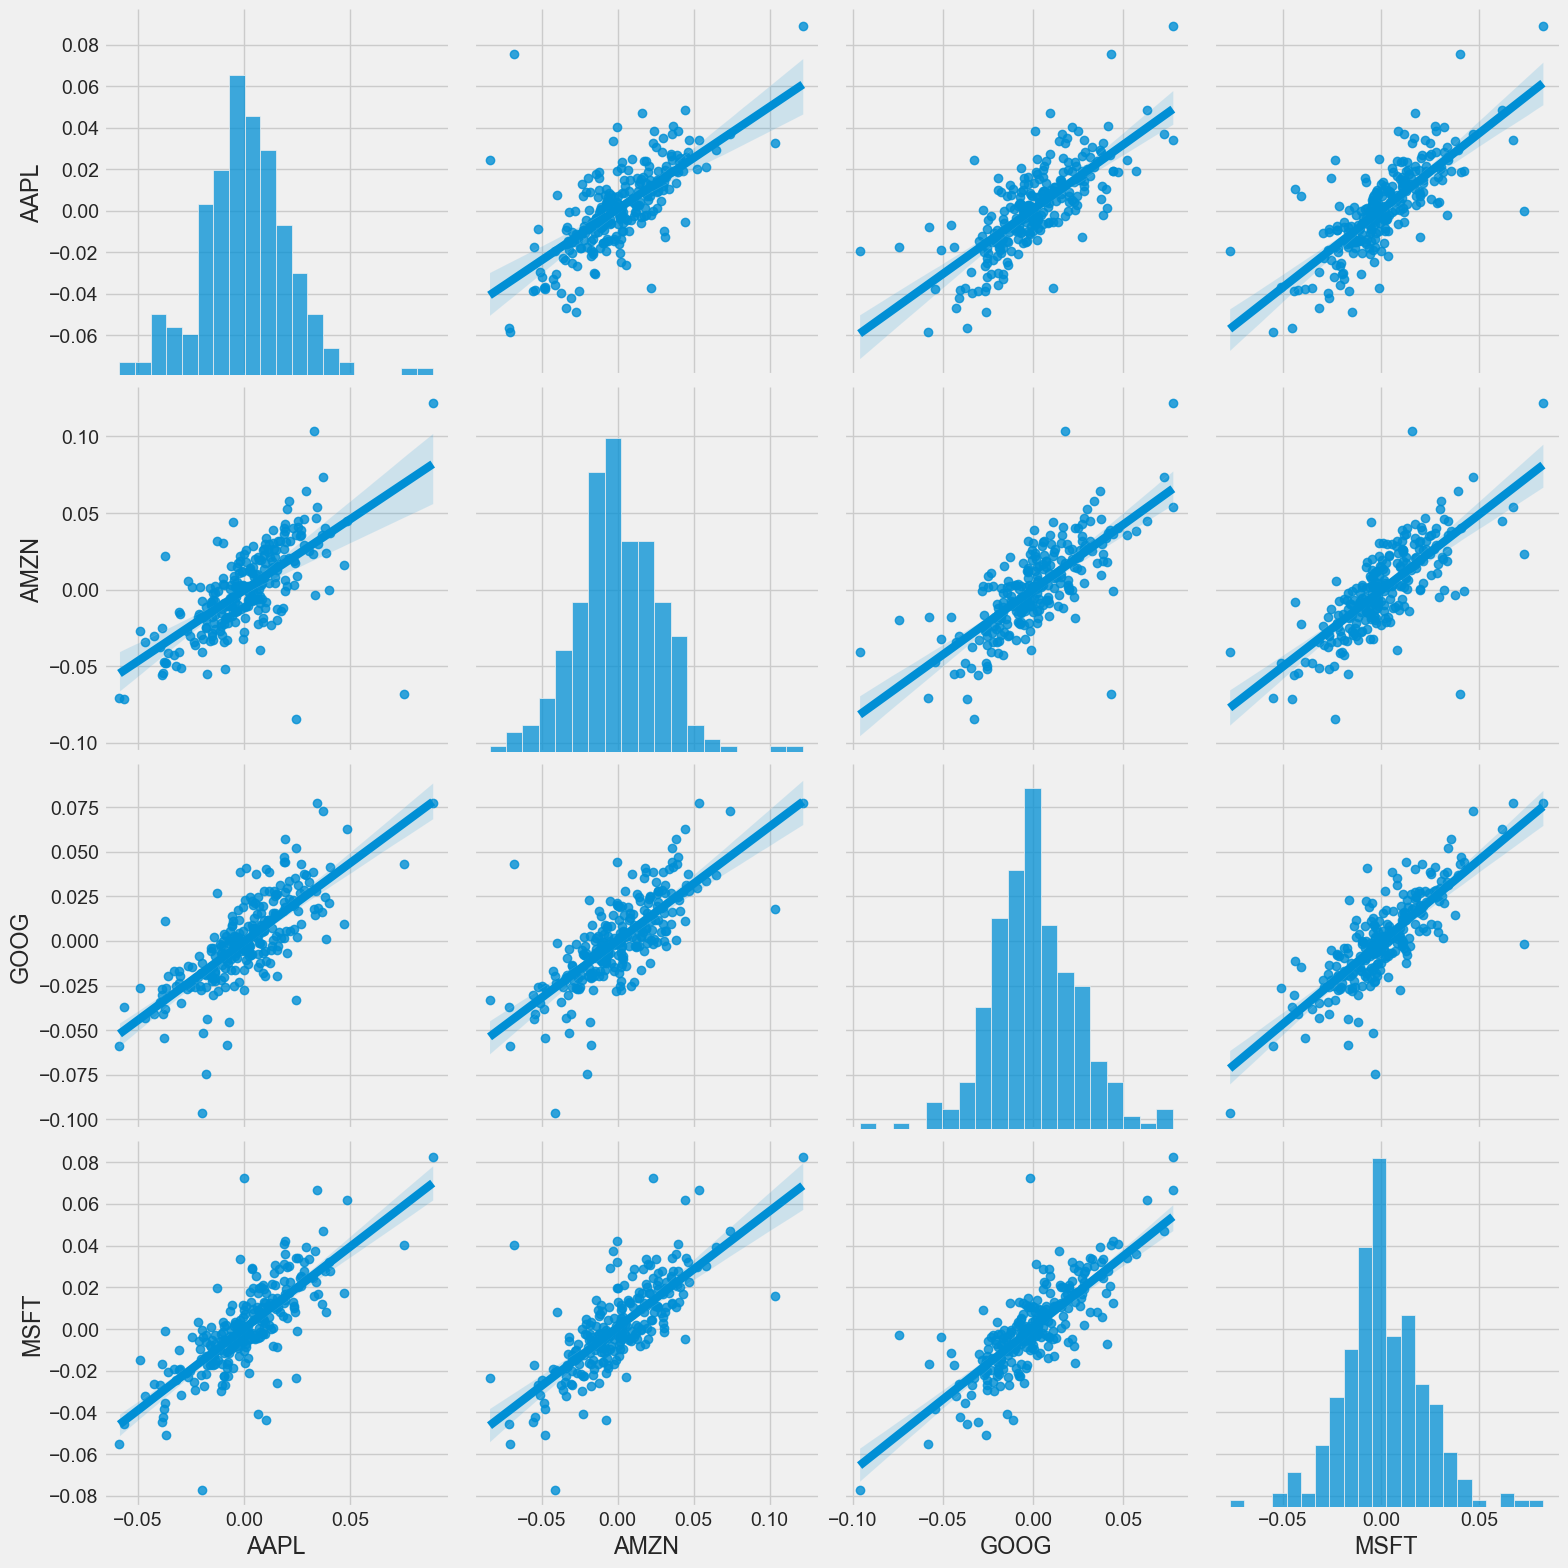

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg',height=4)

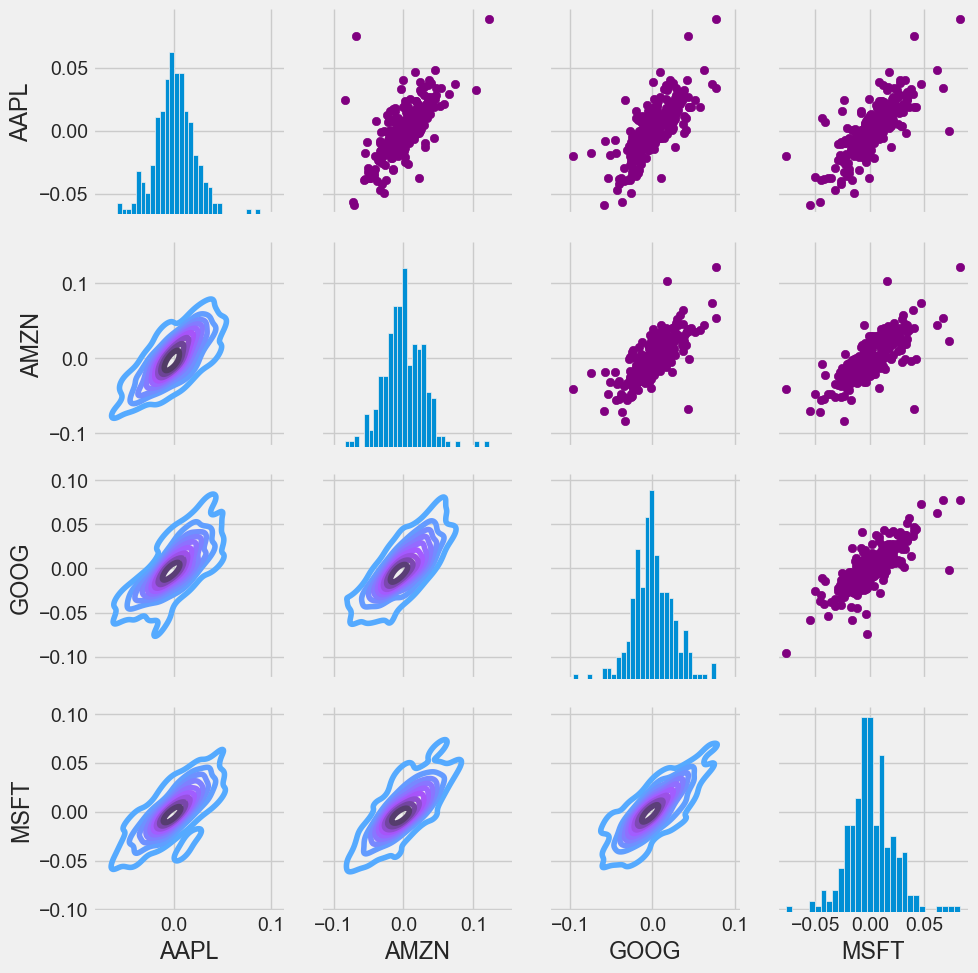

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

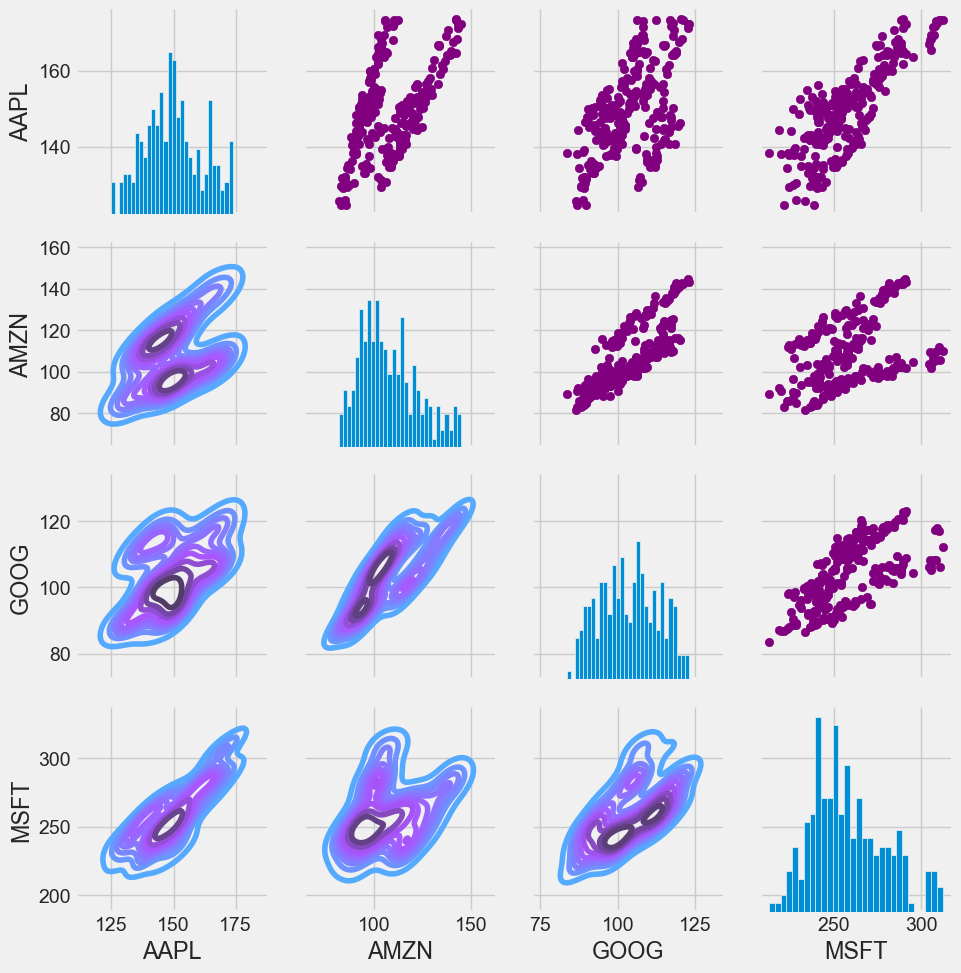

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

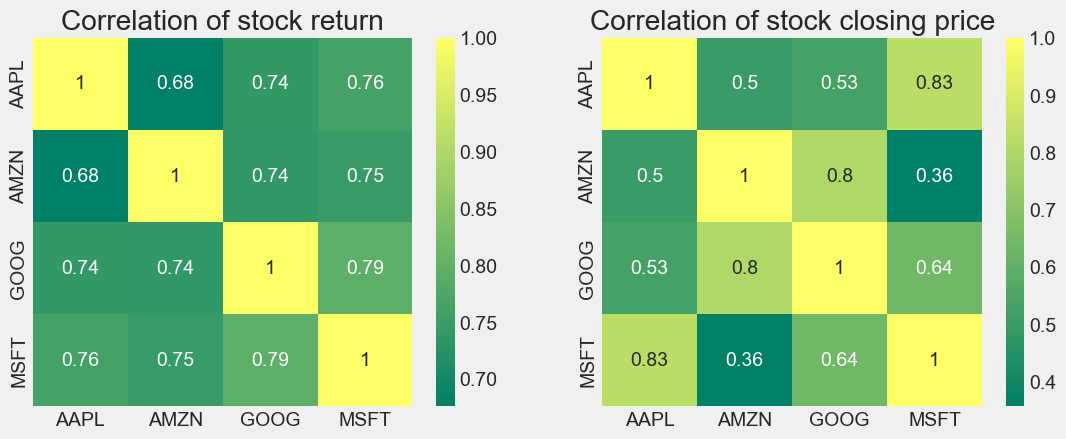

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## How much value do we put at risk by investing in a particular stock?

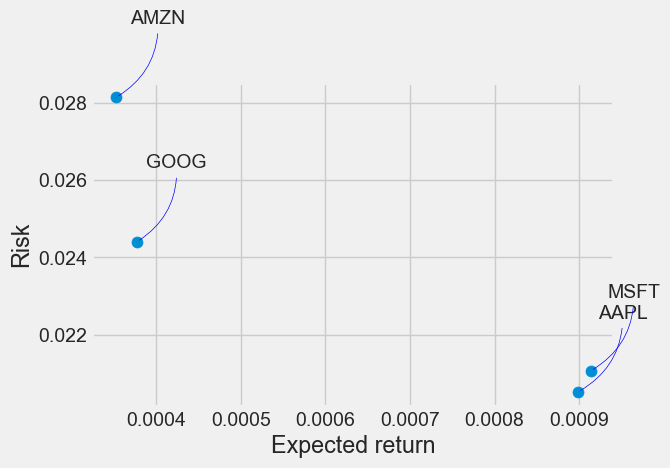

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(6, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price of AMAZON inc:

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AMZN', start='2018-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...
2023-05-09,105.480003,106.790001,105.160004,106.620003,106.620003,44089400
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600
2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74924800


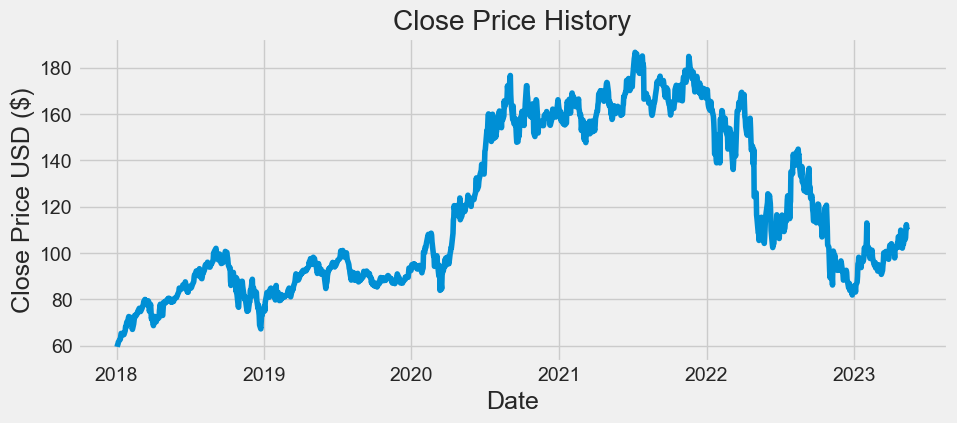

In [19]:
plt.figure(figsize=(10,4))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1284

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00597466],
       [0.00809471],
       ...,
       [0.41480099],
       [0.39969716],
       [0.39529184]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.        , 0.00597466, 0.00809471, 0.0157843 , 0.02275801,
       0.02505112, 0.02569225, 0.03448316, 0.04570093, 0.04556715,
       0.04168895, 0.04102816, 0.04152373, 0.05439743, 0.0682544 ,
       0.06627599, 0.0743156 , 0.08379485, 0.08994259, 0.09786421,
       0.10300505, 0.07905522, 0.0947687 , 0.07905522, 0.09983872,
       0.08958855, 0.06351873, 0.05923146, 0.07757238, 0.08869574,
       0.10306795, 0.1072805 , 0.10213972, 0.10987259, 0.1156034 ,
       0.11655521, 0.12232143, 0.13095503, 0.1270335 , 0.12721836,
       0.11974513, 0.12241974, 0.1316079 , 0.13712637, 0.14002124,
       0.1427195 , 0.1533512 , 0.1610211 , 0.15700517, 0.15811441,
       0.15470026, 0.15051526, 0.13999369, 0.15634834, 0.15451937,
       0.13998979, 0.12057505, 0.14429279, 0.12116112, 0.09534691])]
[0.10160869078816598]

[array([0.        , 0.00597466, 0.00809471, 0.0157843 , 0.02275801,
       0.02505112, 0.02569225, 0.03448316, 0.04570093, 0.04556715,
       0.04168895, 0.04102816, 0.04

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1224/1224 [==============================] - 44s 33ms/step - loss: 0.0039


In [24]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 1s 16ms/step


2.72253535754109

C:\Users\hp\AppData\Local\Temp\ipykernel_20056\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


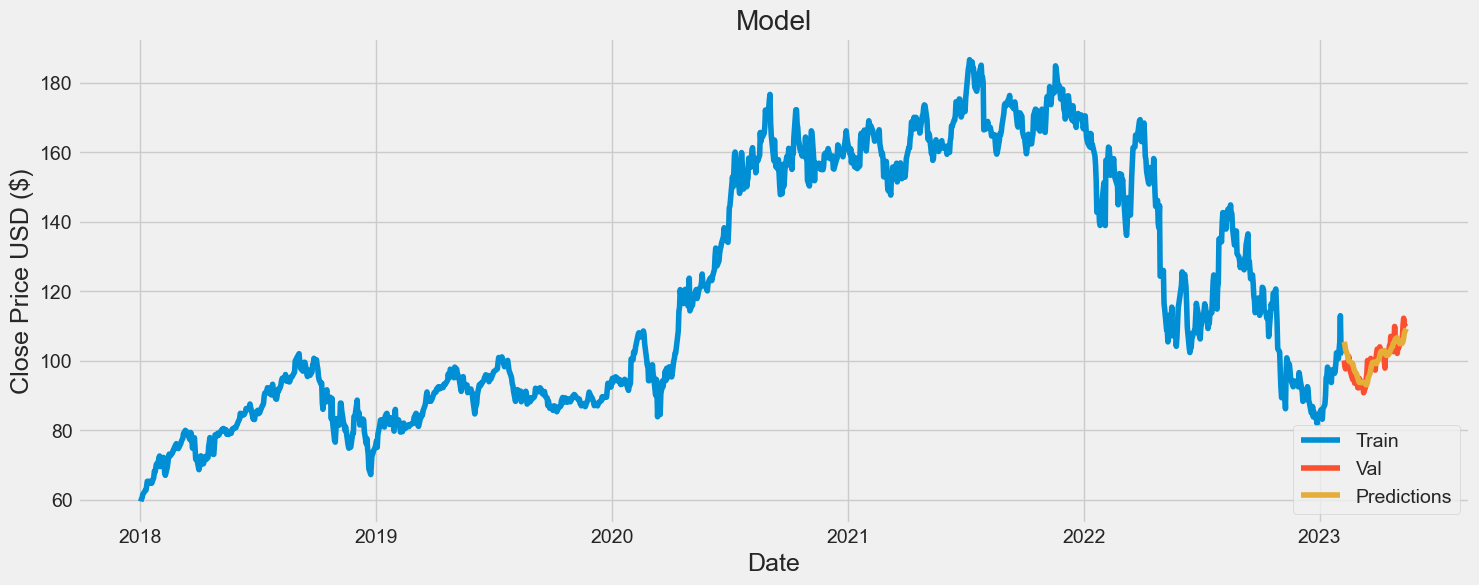

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-02-08,100.050003,105.378220
2023-02-09,98.239998,104.482964
2023-02-10,97.610001,103.145164
2023-02-13,99.540001,101.671173
2023-02-14,99.699997,100.620178
...,...,...
2023-05-09,106.620003,105.078560
2023-05-10,110.190002,105.504768
2023-05-11,112.180000,106.511765
